In [1]:
#warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd

# data visuzlization
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

In [3]:
# max columns
pd.set_option('display.max_columns', None)
# max rows
pd.set_option('display.max_rows', None)

In [4]:
x = pd.read_csv('x1_di.csv')
y = pd.read_csv('y1_di.csv')

In [5]:
x.shape

(98052, 29)

In [6]:
x.head()

,Unnamed: 0,num_lab_procedures,glimepiride_Yes,max_glu_serum_>300,glyburide_Yes,insulin_Yes,rosiglitazone_Yes,number_emergency,age_adult,number_diagnoses,A1Cresult_Norm,race_Hispanic,num_medications,max_glu_serum_None,metformin_Yes,A1Cresult_Not Normal,race_Asian,age_child,race_Other,readmitted_Yes,num_procedures,number_outpatient,time_in_hospital,number_inpatient,race_Caucasian,glipizide_Yes,gender_Male,pioglitazone_Yes,change_No
0,1,59,0,0,0,1,0,0,0,9,0,0,18,1,0,0,0,1,0,1,0,0,3,0,1,0,0,0,0
1,2,11,0,0,0,0,0,0,1,6,0,0,13,1,0,0,0,0,0,0,5,2,2,1,0,1,0,0,1
2,3,44,0,0,0,1,0,0,1,7,0,0,16,1,0,0,0,0,0,0,1,0,2,0,1,0,1,0,0
3,4,51,0,0,0,1,0,0,1,5,0,0,8,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
4,5,31,0,0,0,1,0,0,1,9,0,0,16,1,0,0,0,0,0,1,6,0,3,0,1,0,1,0,1


In [7]:
x = x.drop('Unnamed: 0',axis=1)

In [8]:
x.head()

,num_lab_procedures,glimepiride_Yes,max_glu_serum_>300,glyburide_Yes,insulin_Yes,rosiglitazone_Yes,number_emergency,age_adult,number_diagnoses,A1Cresult_Norm,race_Hispanic,num_medications,max_glu_serum_None,metformin_Yes,A1Cresult_Not Normal,race_Asian,age_child,race_Other,readmitted_Yes,num_procedures,number_outpatient,time_in_hospital,number_inpatient,race_Caucasian,glipizide_Yes,gender_Male,pioglitazone_Yes,change_No
0,59,0,0,0,1,0,0,0,9,0,0,18,1,0,0,0,1,0,1,0,0,3,0,1,0,0,0,0
1,11,0,0,0,0,0,0,1,6,0,0,13,1,0,0,0,0,0,0,5,2,2,1,0,1,0,0,1
2,44,0,0,0,1,0,0,1,7,0,0,16,1,0,0,0,0,0,0,1,0,2,0,1,0,1,0,0
3,51,0,0,0,1,0,0,1,5,0,0,8,1,0,0,0,0,0,0,0,0,1,0,1,1,1,0,0
4,31,0,0,0,1,0,0,1,9,0,0,16,1,0,0,0,0,0,1,6,0,3,0,1,0,1,0,1


In [9]:
y.columns

Index(['Unnamed: 0', 'Diabetes'], dtype='object')

In [10]:
y = y.drop('Unnamed: 0',axis=1)
y[:3]

,Diabetes
0,1
1,1
2,1


In [11]:
y = y['Diabetes']

In [12]:
from sklearn.metrics import classification_report,accuracy_score,roc_auc_score,roc_curve

# Logistic Regression

In [13]:
from sklearn.model_selection import  train_test_split

Xtrain,Xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=48,stratify=y)

In [14]:
Xtrain.shape,Xtest.shape,ytrain.shape,ytest.shape

((68636, 28), (29416, 28), (68636,), (29416,))

In [15]:
from sklearn.preprocessing import  StandardScaler
st = StandardScaler()
Xtrain_t = st.fit_transform(Xtrain)
Xtrain_t=pd.DataFrame(Xtrain_t,columns=x.columns)
Xtrain_t.head()

,num_lab_procedures,glimepiride_Yes,max_glu_serum_>300,glyburide_Yes,insulin_Yes,rosiglitazone_Yes,number_emergency,age_adult,number_diagnoses,A1Cresult_Norm,race_Hispanic,num_medications,max_glu_serum_None,metformin_Yes,A1Cresult_Not Normal,race_Asian,age_child,race_Other,readmitted_Yes,num_procedures,number_outpatient,time_in_hospital,number_inpatient,race_Caucasian,glipizide_Yes,gender_Male,pioglitazone_Yes,change_No
0,1.314587,-0.231316,-0.11218,-0.342417,0.940735,-0.26051,0.866474,-0.678507,0.813301,-0.226630,-0.14218,2.332501,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,1.553356,-0.293034,1.527613,-0.508778,0.551002,-0.377347,1.082252,-0.279187,-1.082538
1,-2.136965,-0.231316,-0.11218,-0.342417,0.940735,-0.26051,1.948421,-0.678507,0.813301,-0.226630,-0.14218,-0.013138,0.237815,2.033499,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,1.193721,1.854920,0.551002,-0.377347,-0.923999,3.581835,-1.082538
2,1.060796,-0.231316,-0.11218,-0.342417,0.940735,-0.26051,-0.215472,1.473825,0.266694,4.412485,-0.14218,-0.013138,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,-0.475735,-0.508778,0.551002,-0.377347,1.082252,-0.279187,-1.082538
3,1.771410,-0.231316,-0.11218,2.920412,0.940735,-0.26051,-0.215472,-0.678507,0.813301,-0.226630,-0.14218,1.097954,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,0.859830,-0.508778,0.551002,2.650077,-0.923999,3.581835,-1.082538
4,1.974442,-0.231316,-0.11218,-0.342417,0.940735,-0.26051,-0.215472,-0.678507,0.813301,-0.226630,-0.14218,0.727590,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,-0.932212,-0.789611,-0.293034,1.193721,-0.508778,0.551002,-0.377347,1.082252,-0.279187,-1.082538


In [16]:
Xtest_t = st.transform(Xtest)
Xtest_t=pd.DataFrame(Xtest_t,columns=x.columns)
Xtest_t.head()

,num_lab_procedures,glimepiride_Yes,max_glu_serum_>300,glyburide_Yes,insulin_Yes,rosiglitazone_Yes,number_emergency,age_adult,number_diagnoses,A1Cresult_Norm,race_Hispanic,num_medications,max_glu_serum_None,metformin_Yes,A1Cresult_Not Normal,race_Asian,age_child,race_Other,readmitted_Yes,num_procedures,number_outpatient,time_in_hospital,number_inpatient,race_Caucasian,glipizide_Yes,gender_Male,pioglitazone_Yes,change_No
0,0.350183,4.323082,-0.11218,-0.342417,0.940735,-0.260510,-0.215472,-0.678507,0.813301,-0.22663,-0.14218,1.715228,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,2.863178,-0.508778,0.551002,-0.377347,1.082252,3.581835,-1.082538
1,0.603973,-0.231316,-0.11218,-0.342417,0.940735,3.838617,-0.215472,-0.678507,0.813301,-0.22663,-0.14218,2.579410,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,-0.932212,2.139098,-0.293034,1.861504,-0.508778,0.551002,-0.377347,1.082252,-0.279187,-1.082538
2,0.603973,-0.231316,-0.11218,-0.342417,-1.062998,-0.260510,-0.215472,-0.678507,-0.826521,-0.22663,-0.14218,0.357226,0.237815,2.033499,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,0.967614,-0.293034,-0.141844,-0.508778,0.551002,-0.377347,1.082252,-0.279187,0.923755
3,1.111554,-0.231316,-0.11218,-0.342417,0.940735,-0.260510,-0.215472,-0.678507,0.813301,-0.22663,-0.14218,0.480681,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,1.072717,-0.789611,-0.293034,1.193721,-0.508778,0.551002,-0.377347,-0.923999,-0.279187,0.923755
4,1.822168,-0.231316,-0.11218,2.920412,0.940735,-0.260510,-0.215472,-0.678507,0.813301,-0.22663,-0.14218,1.962137,0.237815,-0.491763,-0.362483,-0.079586,-0.073119,-0.122455,-0.932212,0.967614,-0.293034,3.197069,-0.508778,0.551002,-0.377347,-0.923999,3.581835,-1.082538


In [17]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(Xtrain_t,ytrain)
ypred = model.predict(Xtest_t)
ypred1 = model.predict(Xtrain_t)
yprob = model.predict_proba(Xtest_t)
y_prob1=yprob[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_prob1)

In [18]:
pdf=pd.DataFrame(yprob,columns=['y_prob0','y_prob1'])
pdf['y_actual']=list(ytest)
pdf.head()

,y_prob0,y_prob1,y_actual
0,0.913812,0.086188,0
1,0.933839,0.066161,0
2,0.881335,0.118665,0
3,0.895870,0.104130,0
4,0.939037,0.060963,0


In [19]:
p0=pdf[pdf['y_actual']==0]['y_prob1']
p1=pdf[pdf['y_actual']==1]['y_prob1']


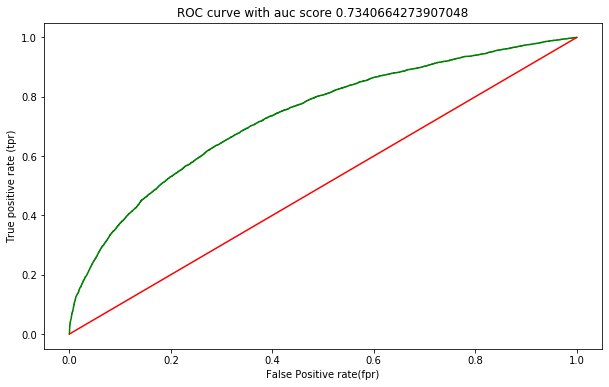

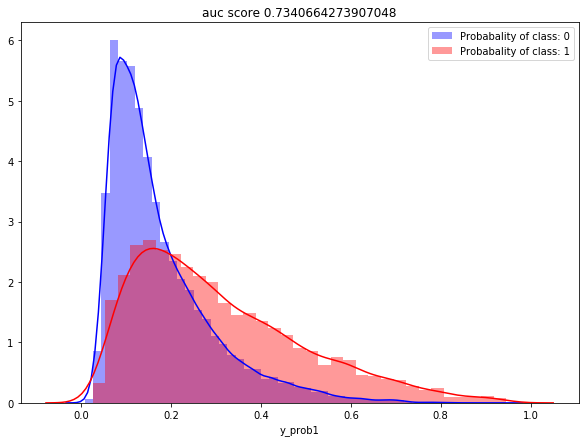

In [20]:
plt.figure(figsize=(10,6))
x=[i/10 for i in range(11)]
plt.plot(fpr,tpr,color='g')
plt.plot(x,x,color='r')
plt.title(f'ROC curve with auc score {roc_auc_score(ytest,y_prob1)}')
plt.ylabel('True positive rate (tpr)')
plt.xlabel('False Positive rate(fpr)')
plt.show()

plt.figure(figsize=(10,7))
sns.distplot(p0,color='b',label='Probabality of class: 0')
sns.distplot(p1,color='r',label='Probabality of class: 1')
plt.title(f'auc score {roc_auc_score(ytest,y_prob1)}')
plt.legend()
plt.show()

In [21]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     23497
           1       0.64      0.16      0.26      5919

    accuracy                           0.81     29416
   macro avg       0.73      0.57      0.58     29416
weighted avg       0.79      0.81      0.77     29416



In [22]:
print(classification_report(ytrain,ypred1))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     54825
           1       0.64      0.16      0.25     13811

    accuracy                           0.81     68636
   macro avg       0.73      0.57      0.57     68636
weighted avg       0.78      0.81      0.76     68636



# RandomForest

In [23]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

rfc=RandomForestClassifier(random_state=3)

params={ 'n_estimators': sp_randint(50,200),
        'max_features': sp_randint(1,24),
        'max_depth': sp_randint(2,10),
        'min_samples_split': sp_randint(2,20),
        'min_samples_leaf': sp_randint(1,20),
        'criterion':['gini', 'entropy']    }

rsearch_rfc=RandomizedSearchCV(rfc, param_distributions=params, n_iter=50, cv=3,\
                           scoring='roc_auc', random_state=3, return_train_score=True)

rsearch_rfc.fit(Xtrain_t,ytrain)

<IPython.core.display.Javascript object>

RandomizedSearchCV(cv=3, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

In [24]:
rsearch_rfc.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 7,
 'min_samples_leaf': 1,
 'min_samples_split': 14,
 'n_estimators': 143}

In [25]:
rfc=RandomForestClassifier(**rsearch_rfc.best_params_)

<IPython.core.display.Javascript object>

In [26]:
rfc.fit(Xtrain_t,ytrain)
ypred = rfc.predict(Xtest_t)
ypred1 = rfc.predict(Xtrain_t)
yprob = rfc.predict_proba(Xtest_t)
y_prob1=yprob[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_prob1)

In [27]:
pdf=pd.DataFrame(yprob,columns=['y_prob0','y_prob1'])
pdf['y_actual']=list(ytest)
pdf.head()

,y_prob0,y_prob1,y_actual
0,0.891699,0.108301,0
1,0.912551,0.087449,0
2,0.862452,0.137548,0
3,0.896099,0.103901,0
4,0.913740,0.086260,0


In [28]:
p0=pdf[pdf['y_actual']==0]['y_prob1']
p1=pdf[pdf['y_actual']==1]['y_prob1']

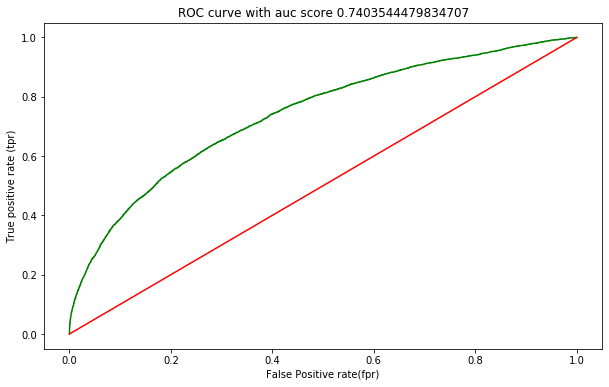

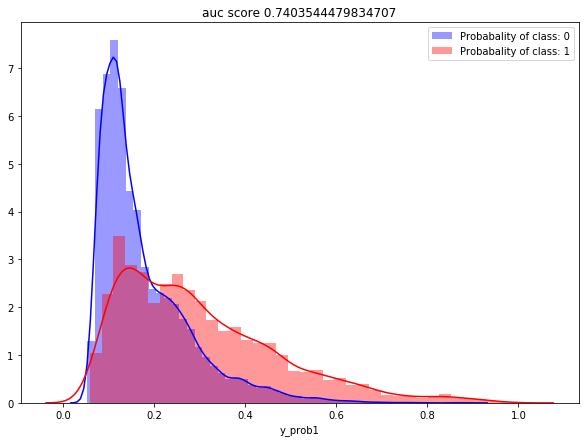

In [29]:
plt.figure(figsize=(10,6))
x=[i/10 for i in range(11)]
plt.plot(fpr,tpr,color='g')
plt.plot(x,x,color='r')
plt.title(f'ROC curve with auc score {roc_auc_score(ytest,y_prob1)}')
plt.ylabel('True positive rate (tpr)')
plt.xlabel('False Positive rate(fpr)')
plt.show()

plt.figure(figsize=(10,7))
sns.distplot(p0,color='b',label='Probabality of class: 0')
sns.distplot(p1,color='r',label='Probabality of class: 1')
plt.title(f'auc score {roc_auc_score(ytest,y_prob1)}')
plt.legend()
plt.show()

In [30]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.99      0.89     23497
           1       0.71      0.13      0.22      5919

    accuracy                           0.81     29416
   macro avg       0.76      0.56      0.56     29416
weighted avg       0.80      0.81      0.76     29416



In [31]:
print(classification_report(ytrain,ypred1))

              precision    recall  f1-score   support

           0       0.82      0.99      0.90     54825
           1       0.78      0.14      0.24     13811

    accuracy                           0.82     68636
   macro avg       0.80      0.57      0.57     68636
weighted avg       0.81      0.82      0.77     68636



# AdaBoostClassifier

## DT

In [32]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
wldt=DecisionTreeClassifier(max_depth=1,random_state=0)
AdaDt = AdaBoostClassifier(base_estimator=wldt, n_estimators=10,random_state=0)

In [33]:
AdaDt.fit(Xtrain_t,ytrain)
ypred = AdaDt.predict(Xtest_t)
ypred1 = AdaDt.predict(Xtrain_t)
yprob = AdaDt.predict_proba(Xtest_t)
y_prob1=yprob[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_prob1)

In [34]:
pdf=pd.DataFrame(yprob,columns=['y_prob0','y_prob1'])
pdf['y_actual']=list(ytest)
pdf.head()

,y_prob0,y_prob1,y_actual
0,0.548509,0.451491,0
1,0.560941,0.439059,0
2,0.567067,0.432933,0
3,0.548509,0.451491,0
4,0.560941,0.439059,0


In [35]:
p0=pdf[pdf['y_actual']==0]['y_prob1']
p1=pdf[pdf['y_actual']==1]['y_prob1']

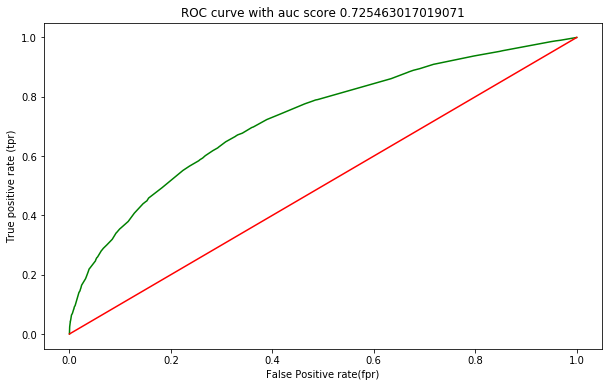

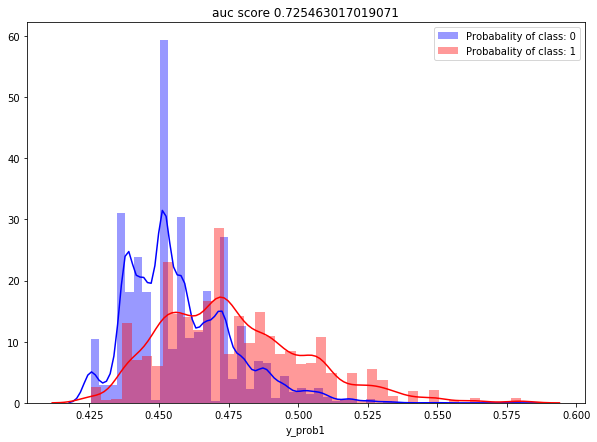

In [36]:
plt.figure(figsize=(10,6))
x=[i/10 for i in range(11)]
plt.plot(fpr,tpr,color='g')
plt.plot(x,x,color='r')
plt.title(f'ROC curve with auc score {roc_auc_score(ytest,y_prob1)}')
plt.ylabel('True positive rate (tpr)')
plt.xlabel('False Positive rate(fpr)')
plt.show()

plt.figure(figsize=(10,7))
sns.distplot(p0,color='b',label='Probabality of class: 0')
sns.distplot(p1,color='r',label='Probabality of class: 1')
plt.title(f'auc score {roc_auc_score(ytest,y_prob1)}')
plt.legend()
plt.show()

In [37]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.89     23497
           1       0.60      0.19      0.28      5919

    accuracy                           0.81     29416
   macro avg       0.71      0.58      0.59     29416
weighted avg       0.78      0.81      0.77     29416



In [38]:
print(classification_report(ytrain,ypred1))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89     54825
           1       0.59      0.18      0.28     13811

    accuracy                           0.81     68636
   macro avg       0.71      0.57      0.58     68636
weighted avg       0.78      0.81      0.77     68636



## LR

In [39]:
from sklearn.ensemble import AdaBoostClassifier
wllr=LogisticRegression()
Adalr= AdaBoostClassifier(base_estimator=wllr, n_estimators=10,random_state=0)

In [40]:
Adalr.fit(Xtrain_t,ytrain)
ypred = Adalr.predict(Xtest_t)
ypred1 = Adalr.predict(Xtrain_t)
yprob = Adalr.predict_proba(Xtest_t)
y_prob1=yprob[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_prob1)

In [41]:
pdf=pd.DataFrame(yprob,columns=['y_prob0','y_prob1'])
pdf['y_actual']=list(ytest)
pdf.head()

,y_prob0,y_prob1,y_actual
0,0.551048,0.448952,0
1,0.556318,0.443682,0
2,0.541835,0.458165,0
3,0.546440,0.453560,0
4,0.558556,0.441444,0


In [42]:
p0=pdf[pdf['y_actual']==0]['y_prob1']
p1=pdf[pdf['y_actual']==1]['y_prob1']

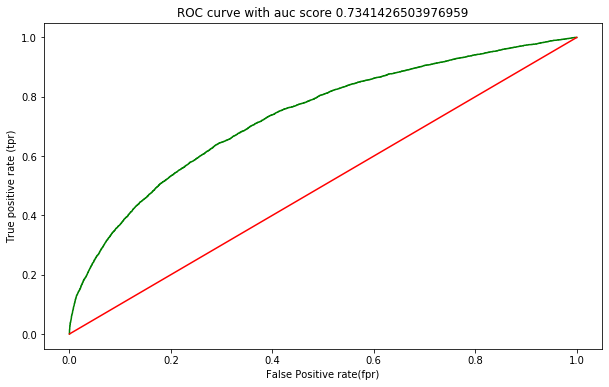

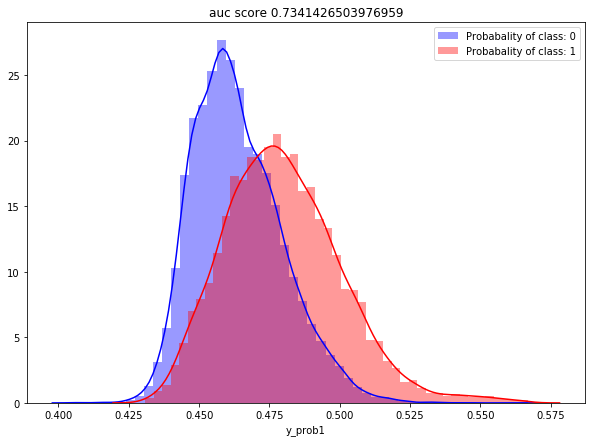

In [43]:
plt.figure(figsize=(10,6))
x=[i/10 for i in range(11)]
plt.plot(fpr,tpr,color='g')
plt.plot(x,x,color='r')
plt.title(f'ROC curve with auc score {roc_auc_score(ytest,y_prob1)}')
plt.ylabel('True positive rate (tpr)')
plt.xlabel('False Positive rate(fpr)')
plt.show()

plt.figure(figsize=(10,7))
sns.distplot(p0,color='b',label='Probabality of class: 0')
sns.distplot(p1,color='r',label='Probabality of class: 1')
plt.title(f'auc score {roc_auc_score(ytest,y_prob1)}')
plt.legend()
plt.show()

In [44]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     23497
           1       0.64      0.16      0.25      5919

    accuracy                           0.81     29416
   macro avg       0.73      0.57      0.57     29416
weighted avg       0.79      0.81      0.76     29416



In [45]:
print(classification_report(ytrain,ypred1))

              precision    recall  f1-score   support

           0       0.82      0.98      0.89     54825
           1       0.65      0.15      0.24     13811

    accuracy                           0.81     68636
   macro avg       0.73      0.56      0.57     68636
weighted avg       0.79      0.81      0.76     68636



# RF

In [46]:
wlrfc=RandomForestClassifier(**rsearch_rfc.best_params_)
Adarf= AdaBoostClassifier(base_estimator=wlrfc, n_estimators=10,random_state=0)

<IPython.core.display.Javascript object>

In [47]:
Adarf.fit(Xtrain_t,ytrain)
ypred = Adarf.predict(Xtest_t)
ypred1 = Adarf.predict(Xtrain_t)
yprob = Adarf.predict_proba(Xtest_t)
y_prob1=yprob[:,1]
fpr,tpr,thresholds=roc_curve(ytest,y_prob1)

In [48]:
pdf=pd.DataFrame(yprob,columns=['y_prob0','y_prob1'])
pdf['y_actual']=list(ytest)
pdf.head()

,y_prob0,y_prob1,y_actual
0,0.581199,0.418801,0
1,0.568766,0.431234,0
2,0.548922,0.451078,0
3,0.562151,0.437849,0
4,0.578692,0.421308,0


In [49]:
p0=pdf[pdf['y_actual']==0]['y_prob1']
p1=pdf[pdf['y_actual']==1]['y_prob1']

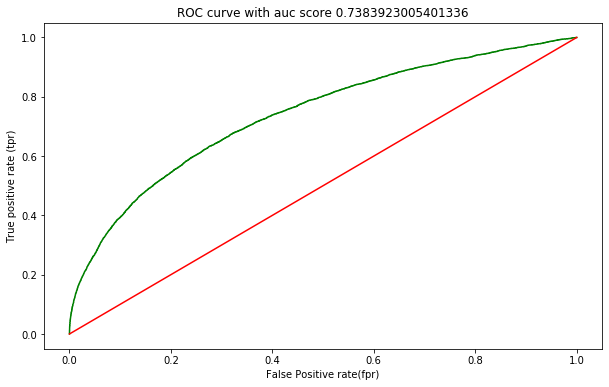

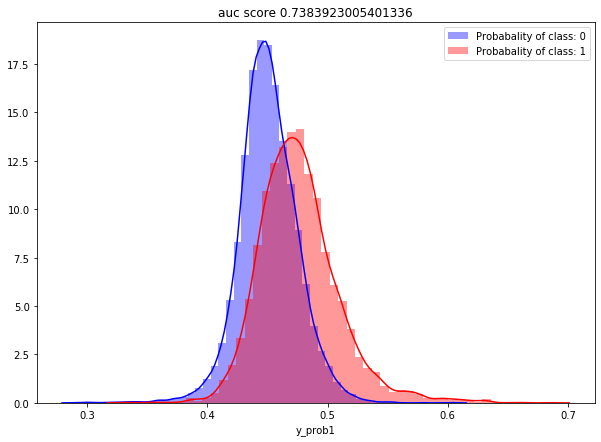

In [50]:
plt.figure(figsize=(10,6))
x=[i/10 for i in range(11)]
plt.plot(fpr,tpr,color='g')
plt.plot(x,x,color='r')
plt.title(f'ROC curve with auc score {roc_auc_score(ytest,y_prob1)}')
plt.ylabel('True positive rate (tpr)')
plt.xlabel('False Positive rate(fpr)')
plt.show()

plt.figure(figsize=(10,7))
sns.distplot(p0,color='b',label='Probabality of class: 0')
sns.distplot(p1,color='r',label='Probabality of class: 1')
plt.title(f'auc score {roc_auc_score(ytest,y_prob1)}')
plt.legend()
plt.show()

In [51]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.83      0.97      0.90     23497
           1       0.66      0.19      0.30      5919

    accuracy                           0.82     29416
   macro avg       0.74      0.58      0.60     29416
weighted avg       0.79      0.82      0.78     29416



In [52]:
print(classification_report(ytrain,ypred1))

              precision    recall  f1-score   support

           0       0.84      0.98      0.91     54825
           1       0.79      0.25      0.38     13811

    accuracy                           0.84     68636
   macro avg       0.81      0.62      0.64     68636
weighted avg       0.83      0.84      0.80     68636

